In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.shape

(375, 6)

In [4]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [7]:
df.columns = ['Age', 'Gender', 'Degree', 'Job', 'Experience', 'Salary']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         373 non-null    float64
 1   Gender      373 non-null    object 
 2   Degree      373 non-null    object 
 3   Job         373 non-null    object 
 4   Experience  373 non-null    float64
 5   Salary      373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [9]:
df[df.duplicated()]

,Age,Gender,Degree,Job,Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [10]:
data = df.drop_duplicates(keep = 'first')

In [11]:
data.isnull().sum()

Age           1
Gender        1
Degree        1
Job           1
Experience    1
Salary        1
dtype: int64

In [12]:
data.dropna(how = 'any', inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\688763447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how = 'any', inplace = True)


In [13]:
data.shape

(324, 6)

In [14]:
data.head()

,Age,Gender,Degree,Job,Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [15]:
data.describe()

,Age,Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [16]:
corr = data[['Age', 'Experience', 'Salary']].corr()
corr

,Age,Experience,Salary
Age,1.000000,0.979192,0.916543
Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

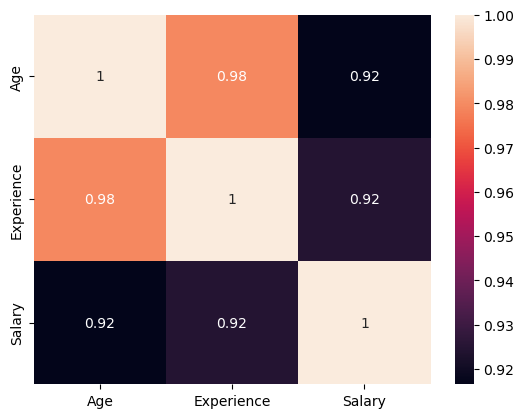

In [17]:
sns.heatmap(corr, annot = True)

In [18]:
data['Degree'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Degree, dtype: int64

<Axes: >

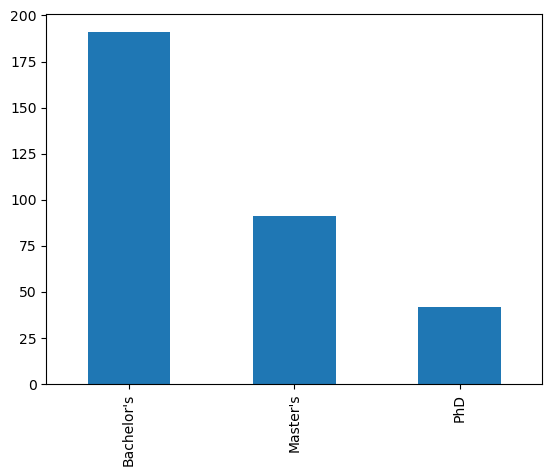

In [19]:
data['Degree'].value_counts().plot(kind = 'bar')

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
data['Gender_encode'] = encoder.fit_transform(data['Gender'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\2823515540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender_encode'] = encoder.fit_transform(data['Gender'])


In [24]:
data['Degree_encode'] = encoder.fit_transform(data['Degree'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\4019643367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Degree_encode'] = encoder.fit_transform(data['Degree'])


In [25]:
data['Job_encode'] = encoder.fit_transform(data['Job'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\130129753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Job_encode'] = encoder.fit_transform(data['Job'])


In [27]:
data.head()

,Age,Gender,Degree,Job,Experience,Salary,Gender_encode,Degree_encode,Job_encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
data['Age_scaled'] = scaler.fit_transform(data[['Age']])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\1157546464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_scaled'] = scaler.fit_transform(data[['Age']])


In [32]:
data['Experience_scaled'] = scaler.fit_transform(data[['Experience']])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13648\4097601218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Experience_scaled'] = scaler.fit_transform(data[['Experience']])


In [33]:
data.head()

,Age,Gender,Degree,Job,Experience,Salary,Gender_encode,Degree_encode,Job_encode,Age_scaled,Experience_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [35]:
X = data[['Age_scaled', 'Gender_encode', 'Degree_encode', 'Job_encode', 'Experience_scaled']]

In [36]:
y = data['Salary']

In [37]:
X.head()

,Age_scaled,Gender_encode,Degree_encode,Job_encode,Experience_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.head()

,Age_scaled,Gender_encode,Degree_encode,Job_encode,Experience_scaled
73,-1.307742,1,0,166,-1.213615
182,0.922302,0,2,155,0.744158
17,0.225413,1,2,116,0.292364
24,0.504169,1,1,37,0.442962
146,0.643547,0,2,115,0.894756


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model= LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [46]:
df2 = pd.DataFrame({'y_actual': y_test, 'y_predicted': y_pred})
df2['Error'] = df2['y_actual']-df2['y_predicted']
df2['abs_error'] = abs(df2['Error'])
Mean_abs = df2['abs_error'].mean()
Mean_abs

10570.786401136176

In [47]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Model Accuracy

In [48]:
r2_score(y_test, y_pred)

0.8911231066517089

In [49]:
round(mean_absolute_error(y_test, y_pred), 2)

10570.79

In [50]:
mse = round(mean_squared_error(y_test, y_pred), 2)
mse

205754135.72

In [51]:
print('root mean squared error: ', mse**(0.5))

root mean squared error:  14344.132449193294


In [52]:
model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

In [53]:
model.intercept_

86001.49320553175